# Lab3

In [1]:
import numpy as np
from scipy import misc
from importlib import reload
from labfuns import *
import random

/var/folders/tr/tw5r1fms33xbc_d62jdwbgqh0000gn/T/ipykernel_88152/419916758.py:2: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


# Assignment 1

In [2]:
# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    # Iterate over both index and value
    for jdx,class_i in enumerate(classes):
        idx = np.where(labels==class_i)[0] # extract the indices for which y==class is true.
        xlc = X[idx,:]                     # Get the x for the class labels. Vectors are rows.
        mu[jdx,:] = np.mean(xlc, axis=0)   # axis=0: computes the mean of each feature (column).

        xlc_cen = xlc - mu[jdx,:]
        
        sigma[jdx,:,:] = np.dot(xlc_cen.T, xlc_cen) / xlc_cen.shape[0]  # .shape[0] means the row number.
        sigma[jdx, :, :] = np.diag(  np.diag(sigma[jdx, :, :])  ) # 1 extract the diagonal and 2 return as a matrix.    
    # ==========================
    return mu, sigma

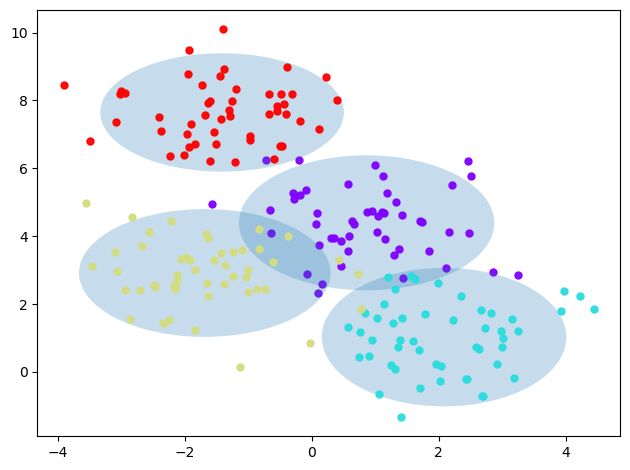

In [3]:
#%matplotlib inline

# Generate synthetic data
X, labels = genBlobs(centers=4)

# Compute ML estimates
mu, sigma = mlParams(X, labels)

# Plot the Gaussian distributions
plotGaussian(X, labels, mu, sigma)

#plt.savefig('1.png')

In [4]:
print(sigma)

[[[1.01248972 0.        ]
  [0.         0.9890469 ]]

 [[0.92848506 0.        ]
  [0.         1.04101998]]

 [[0.98251727 0.        ]
  [0.         0.88654033]]

 [[0.92127374 0.        ]
  [0.         0.76042111]]]


# Assignment 2

In [5]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
        
    classes = np.unique(labels)
    Nclasses = np.size(classes)
    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    for jdx,class_i in enumerate(classes):
        idx = np.where(labels==class_i)[0] # extract the indices for which y==class is true.        
        prior[jdx] = np.sum(W[idx])   

    return prior



In [6]:
# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for k in range(Nclasses):
        mu_k = mu[k,:]
        sigma_k = sigma[k,:,:]

        logDetSigma = np.sum( np.log(np.diag(sigma_k)))
        x_center = X - mu_k       
        inver_sigma = np.diag( 1/ np.diag(sigma_k) )
        item2 = np.sum( x_center @ inver_sigma * x_center, axis=1)

        logProb[k,:] = -0.5*logDetSigma - 0.5*item2 + np.log(prior[k,0])
    h = np.argmax(logProb,axis=0)
    return h

# Assignment 3

In [7]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

In [8]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [9]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClIdx,1],marker='*',c=color,s=50,alpha=0.8, labe

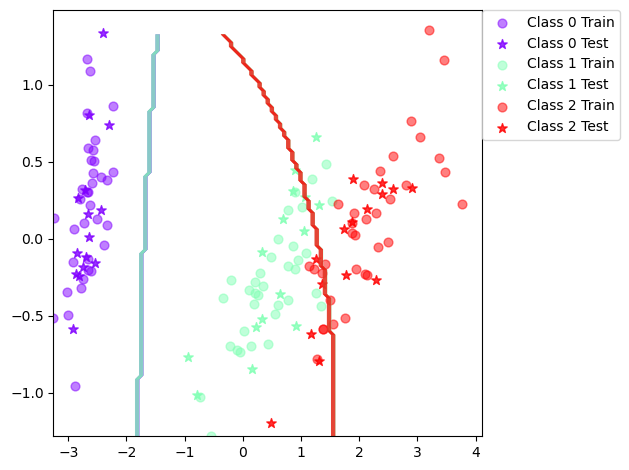

In [10]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)


# Assignment 4

In [12]:
#W = np.ones((Npts,1))/float(Npts)
def mlParams(X, labels, W):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)
    
    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))
    
    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    # Iterate over both index and value
    for jdx,class_i in enumerate(classes):
        idx = np.where(labels==class_i)[0] # extract the indices for which y==class is true.
        xlc = X[idx,:]                     # Get the x for the class labels. Vectors are rows.        
        mu[jdx,:] = np.sum( W[idx] * xlc, axis=0 ) / np.sum(W[idx])   # axis=0: computes the mean of each feature (column).
        xlc_cen = xlc - mu[jdx,:]
    
        sigma[jdx, :, :] = np.dot((W[idx] * xlc_cen).T, xlc_cen) / np.sum(W[idx]) # N*1 N*d, result N*d, then d*N * N*d, result d*d
        #sigma[jdx,:,:] =   np.sum( W[idx] * np.dot(( xlc_cen.T ), xlc_cen)  / np.sum(W) ) # .shape[0] means the row number.
        sigma[jdx, :, :] = np.diag(  np.diag(sigma[jdx, :, :])  ) # 1 extract the diagonal and 2 return as a matrix.    
    # ==========================
    return mu, sigma

# Assignment 5

In [4]:
import numpy as np
from scipy import misc
from importlib import reload
from labfuns import *
import random

In [25]:
#W = np.ones((Npts,1))/float(Npts)
def mlParams(X, labels, W):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)
    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))
    for jdx,class_i in enumerate(classes):
        idx = np.where(labels==class_i)[0] # extract the indices for which y==class is true.
        xlc = X[idx,:]                     # Get the x for the class labels. Vectors are rows.        
        mu[jdx,:] = np.sum( W[idx] * xlc, axis=0 ) / np.sum(W[idx])   # axis=0: computes the mean of each feature (column).
        xlc_cen = xlc - mu[jdx,:]
    
        sigma[jdx, :, :] = np.dot((W[idx] * xlc_cen).T, xlc_cen) / np.sum(W[idx]) # N*1 N*d, result N*d, then d*N * N*d, result d*d
        sigma[jdx, :, :] = np.diag(  np.diag(sigma[jdx, :, :])  ) # 1 extract the diagonal and 2 return as a matrix.    
    return mu, sigma

def computePrior(labels, W):
    Npts = labels.shape[0]
    classes = np.unique(labels)
    Nclasses = np.size(classes)
    prior = np.zeros((Nclasses,1))
    for jdx,class_i in enumerate(classes):
        idx = np.where(labels==class_i)[0] # extract the indices for which y==class is true.  
        sum_class = np.sum(W[idx])         # get the sum of weight for this class
        prior[jdx] = sum_class / np.sum(W) # normalize this weight, divide the whole weight sum, np.sum(W) should be 1.
    #print(prior.shape)                    # prior shape is 3,1, it is correct
    return prior

In [7]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    Npts,Ndims = np.shape(X)
    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list
    wCur = np.ones((Npts,1))/float(Npts)  #step 0, weight is around 0.009
        
    for t in range(0, T):
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur)) 
        vote = classifiers[t].classify(X)  #vote is predicted y, is the label value, like 1, 2,3
        delta = []
        error = 0
        for i in range( len(vote) ):
            if vote[i] == labels[i].astype(float):
                delta.append(0)
            else:
                delta.append(1)         
        error = np.sum( wCur * ( np.array(delta).reshape(-1,1) ) )
        alpha = 0.5 * ( np.log(1- error) - np.log(error) )
        alphas.append(alpha) # you will need to append the new alpha

        w_new = [] # w_new is the new weights
        for i in range( len(wCur) ):
            if vote[i]==labels[i]:
                w_new.append(wCur[i]* np.exp(-alpha))
            else:
                w_new.append(wCur[i]* np.exp( alpha))
        zt = np.sum(w_new) # zt is the normalization factor, the sum of w_new.        
        wCur = np.array(w_new)/zt
        # ==========================
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        for t in range(Ncomps):
            yPred_t = classifiers[t].classify(X)            
            for i in range(Npts):
                votes[i, yPred_t[i]] += alphas[t]
        # ==========================
        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

In [8]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

In [9]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for k in range(Nclasses):
        mu_k = mu[k,:]
        sigma_k = sigma[k,:,:]

        logDetSigma = np.sum( np.log(np.diag(sigma_k)))
        x_center = X - mu_k       
        inver_sigma = np.diag( 1/ np.diag(sigma_k) )
        item2 = np.sum( x_center @ inver_sigma * x_center, axis=1)

        logProb[k,:] = -0.5*logDetSigma - 0.5*item2 + np.log(prior[k,0])
    # ==========================
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

In [11]:
testClassifier(BoostClassifier(BayesClassifier(), T=50), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6


/var/folders/tr/tw5r1fms33xbc_d62jdwbgqh0000gn/T/ipykernel_88152/938982504.py:24: RuntimeWarning: divide by zero encountered in log
  alpha = 0.5 * ( np.log(1- error) - np.log(error) )
/var/folders/tr/tw5r1fms33xbc_d62jdwbgqh0000gn/T/ipykernel_88152/938982504.py:34: RuntimeWarning: invalid value encountered in divide
  wCur = np.array(w_new)/zt


Trial: 10 Accuracy 97.8
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 91.1
Trial: 70 Accuracy 95.6
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.3 with standard deviation 6.68


In [12]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.52


/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClIdx,1],marker='*',c=color,s=50,alpha=0.8, labe

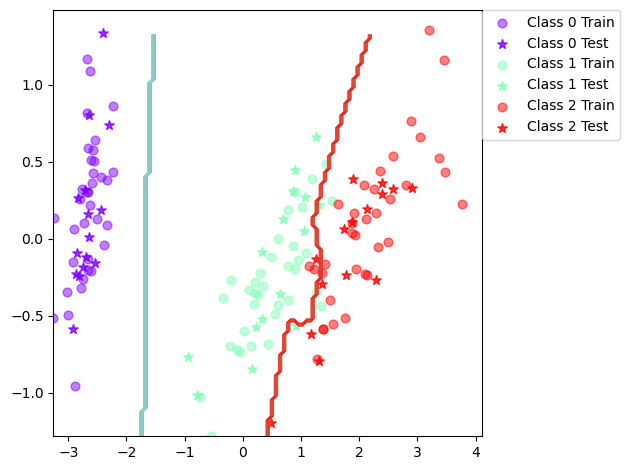

<Figure size 640x480 with 0 Axes>

In [30]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)
plt.savefig("6.png")

# Assignment 6

1: it improved for iris
2: the boundary is more precise.
3: yes, it is possible to use boosting, like for iris, the basic model with boosting, it is more accurate.

In [14]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.67


In [15]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


In [16]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4.02


In [17]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 85.7
Trial: 10 Accuracy 90.3
Trial: 20 Accuracy 87.7
Trial: 30 Accuracy 93.5
Trial: 40 Accuracy 83.1
Trial: 50 Accuracy 79.9
Trial: 60 Accuracy 90.9
Trial: 70 Accuracy 85.7
Trial: 80 Accuracy 83.1
Trial: 90 Accuracy 85.1
Final mean classification accuracy  86.6 with standard deviation 3.21


/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClIdx,1],marker='*',c=color,s=50,alpha=0.8, labe

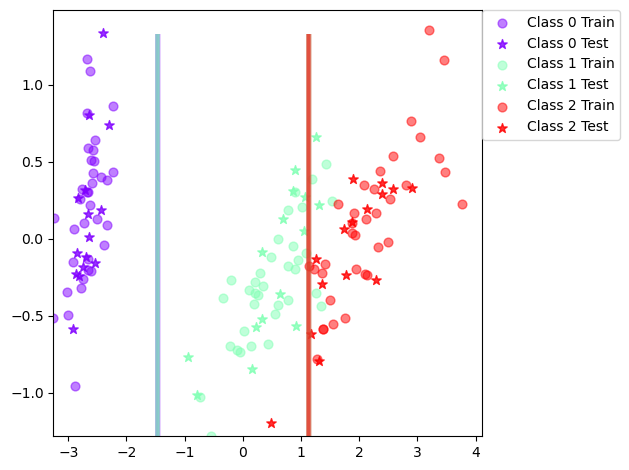

In [18]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/Users/yanjun/Documents/courses/fdd3431/labs/lab3/lab3py/labfuns.py:259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClIdx,1],marker='*',c=color,s=50,alpha=0.8, labe

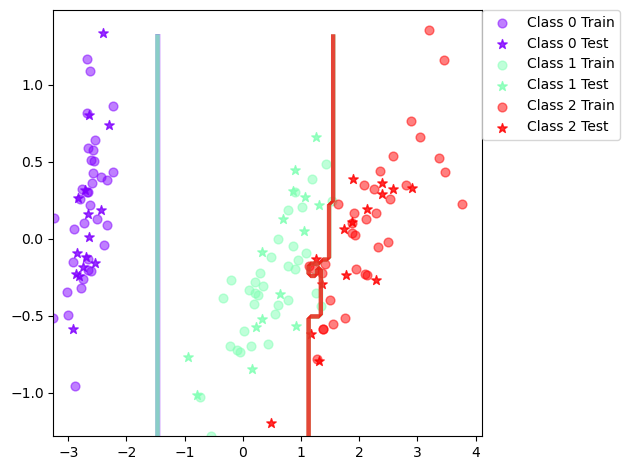

In [31]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=50), dataset='iris',split=0.7)

# Assignment voluntary

In [28]:
#testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

In [26]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 80.8
Trial: 10 Accuracy 69.2
Trial: 20 Accuracy 76.7
Trial: 30 Accuracy 67.5
Trial: 40 Accuracy 75
Trial: 50 Accuracy 68.3
Trial: 60 Accuracy 78.3
Trial: 70 Accuracy 75
Trial: 80 Accuracy 53.3
Trial: 90 Accuracy 65
Final mean classification accuracy  70.2 with standard deviation 6.64


In [32]:
#visualizeOlivettiVectors()